<a href="https://colab.research.google.com/github/Fextstar/customer-segmentation-ml/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
import pandas as pd

# Mount Google Drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Tải dữ liệu
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


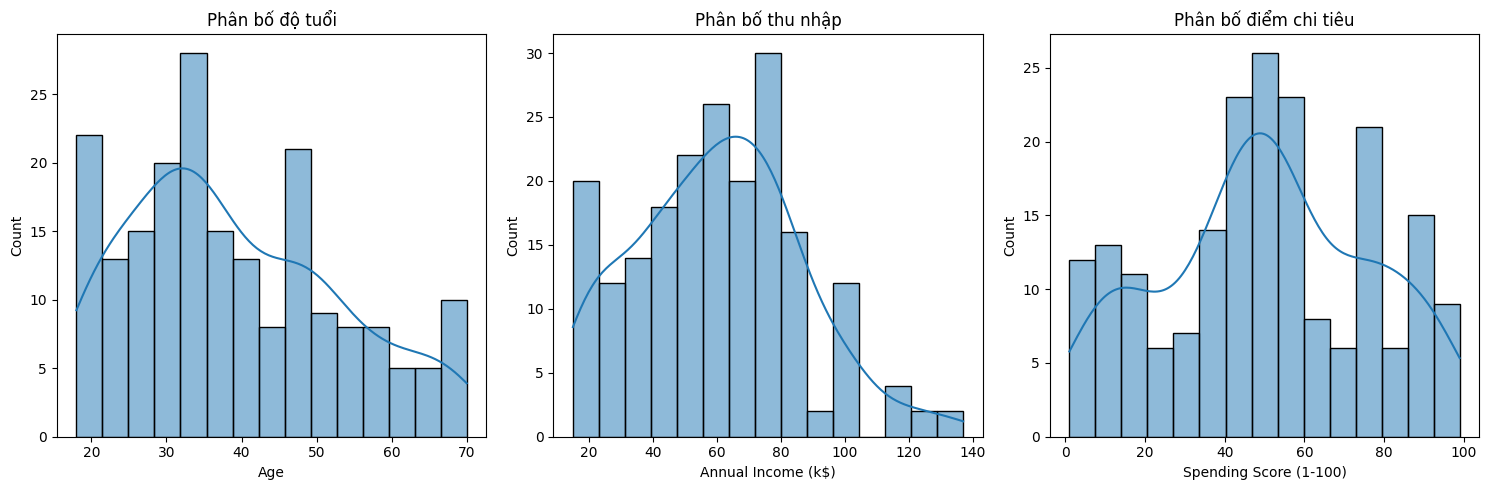

In [ ]:
# Hiển thị phân bố
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Phân bố độ tuổi')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=15)
plt.title('Phân bố thu nhập')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15)
plt.title('Phân bố điểm chi tiêu')
plt.tight_layout()
plt.show()

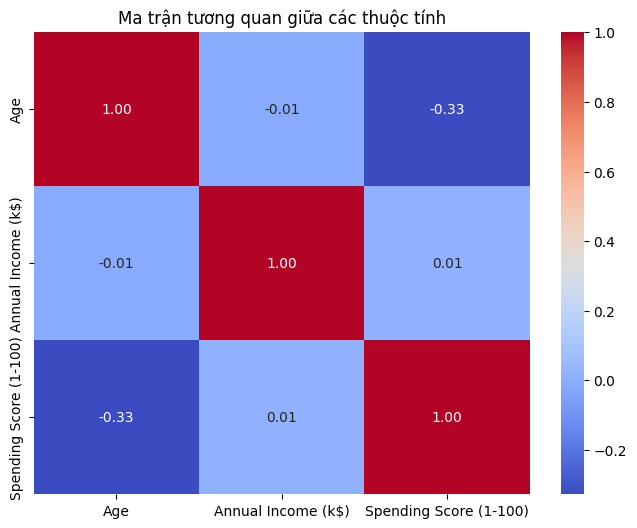

In [ ]:
# Ma trận tương quan
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

In [ ]:
# Tiền xử lý
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# KMeans với 5 cụm
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
# Xem trung bình các cụm
print("\nĐặc trưng trung bình theo cụm:")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Gắn nhãn mô tả cụm
def label_cluster(c):
    if c == 0:
        return 'VIP - thu nhập cao, chi tiêu cao'
    elif c == 1:
        return 'Trung niên tiết kiệm'
    elif c == 2:
        return 'Người trẻ chi tiêu mạnh'
    elif c == 3:
        return 'Khách hàng tiềm năng'
    elif c == 4:
        return 'Thu nhập thấp, chi tiêu thấp'

df['Cluster_Label'] = df['Cluster'].apply(label_cluster)


Đặc trưng trung bình theo cụm:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


**Trực quan hoá và phân cụm**

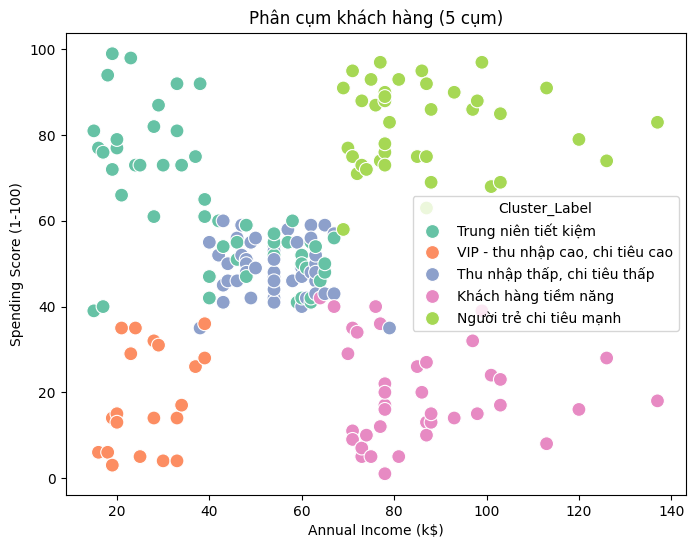

In [ ]:
# Hiển thị phân cụm
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster_Label', palette='Set2', s=100)
plt.title('Phân cụm khách hàng (5 cụm)')
plt.show()

**Kiểm tra sự cân bằng các cụm**

In [ ]:
# Đếm số lượng khách mỗi cụm
print("\nSố lượng khách mỗi cụm:")
print(df['Cluster_Label'].value_counts())


Số lượng khách mỗi cụm:
Cluster_Label
Trung niên tiết kiệm                54
Thu nhập thấp, chi tiêu thấp        47
Người trẻ chi tiêu mạnh             40
Khách hàng tiềm năng                39
VIP - thu nhập cao, chi tiêu cao    20
Name: count, dtype: int64


**Đánh giá phân cụm bằng F1-Score**

In [ ]:
# Phân loại để kiểm tra chất lượng phân cụm
X_train, X_test, y_train, y_test = train_test_split(features, df['Cluster'], test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nF1-score (macro): {f1:.4f}")


F1-score (macro): 0.9867
